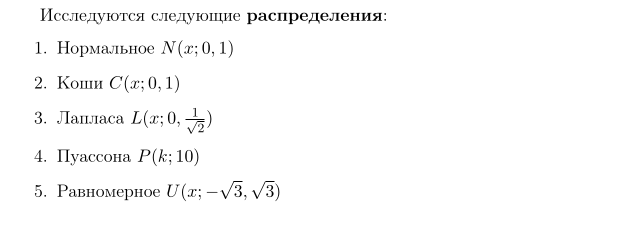

Импортируем весь необходимый инструментарий.

In [18]:
from scipy.stats import norm, cauchy, laplace, poisson, uniform
from scipy.stats import trim_mean
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

# Лабораторная 1

In [19]:
def generate_and_draw(n,a,d,**param):
    random_data = d.rvs(size = n,**param)

    sb.histplot(random_data,stat='density',ax=a,bins='auto')

    x = np.linspace(d.ppf(0.001,**param),
                    d.ppf(0.999,**param),
                    100)
    
    if d == cauchy:
        a.set_xlim(-20, 20)
    
    pdf = d.pmf(np.round(x),**param) if d == poisson else d.pdf(x,**param)

    df = pd.DataFrame({'x': x, 'pdf': pdf})

    sns.set_style("whitegrid")  # или "darkgrid", "white", "dark", "ticks"
    sns.lineplot(data=df, x='x', y='pdf', linewidth=2.5,ax=a,color='orange')


In [20]:
def show_different_n(d,name,**parameters):

    
    n_values = [10, 100, 1000]


    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    

    fig.suptitle(f'{name} при размерах выборки 10, 100 и 1000 (слева направо)',fontsize=16)

    for i, n in enumerate(n_values):
        generate_and_draw(n,axes[i],d,**parameters)


In [21]:
dists = [('Нормальное распределение',norm),
        ('Распределение Коши',cauchy),
        ('Распределение Лапласа',laplace),
        ('Распределение Пуассона',poisson),
        ('Равномерное распределение',uniform)]


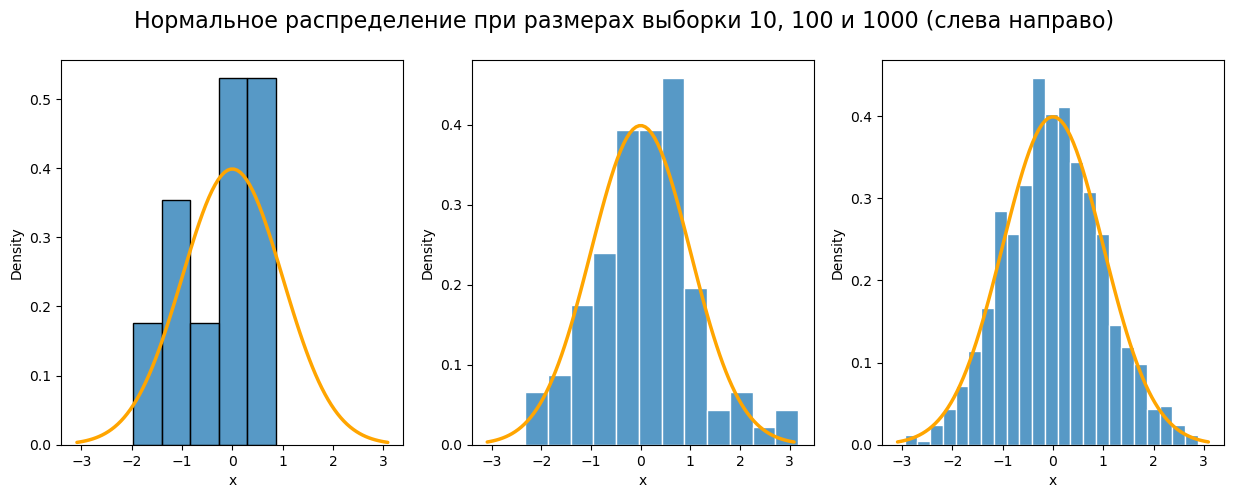

In [22]:
show_different_n(dists[0][1],dists[0][0],loc = 0, scale = 1)

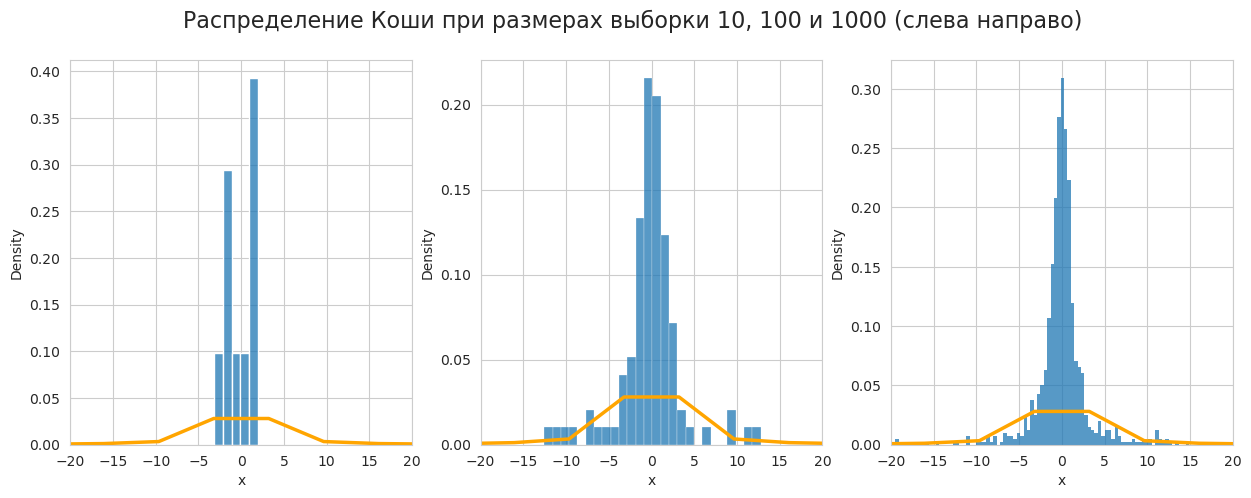

In [168]:
show_different_n(dists[1][1],dists[1][0],loc = 0, scale = 1)

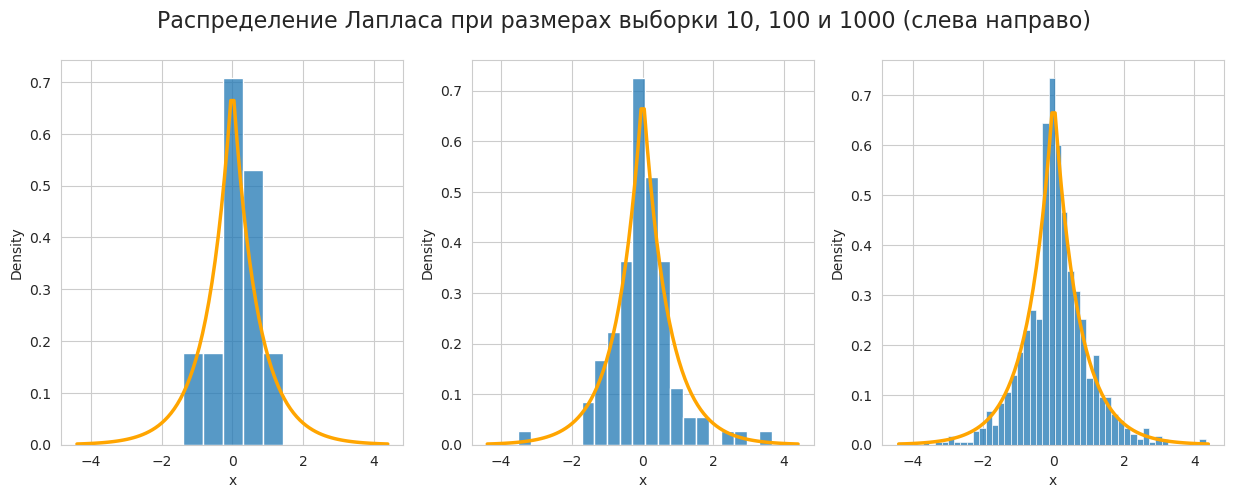

In [169]:
show_different_n(dists[2][1],dists[2][0],loc = 0, scale = 1/sqrt(2))

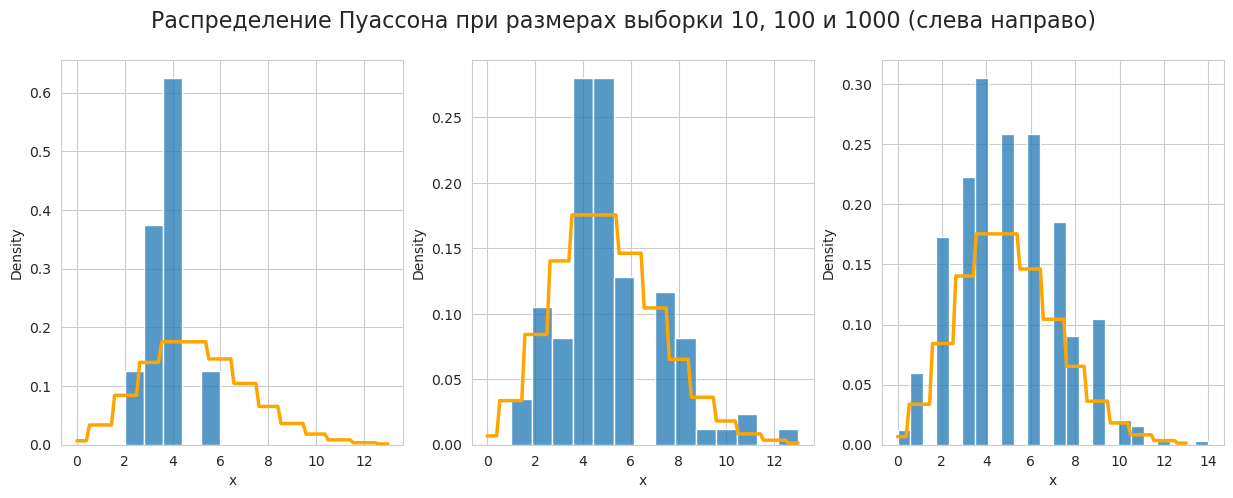

In [23]:
show_different_n(dists[3][1],dists[3][0],mu = 5)

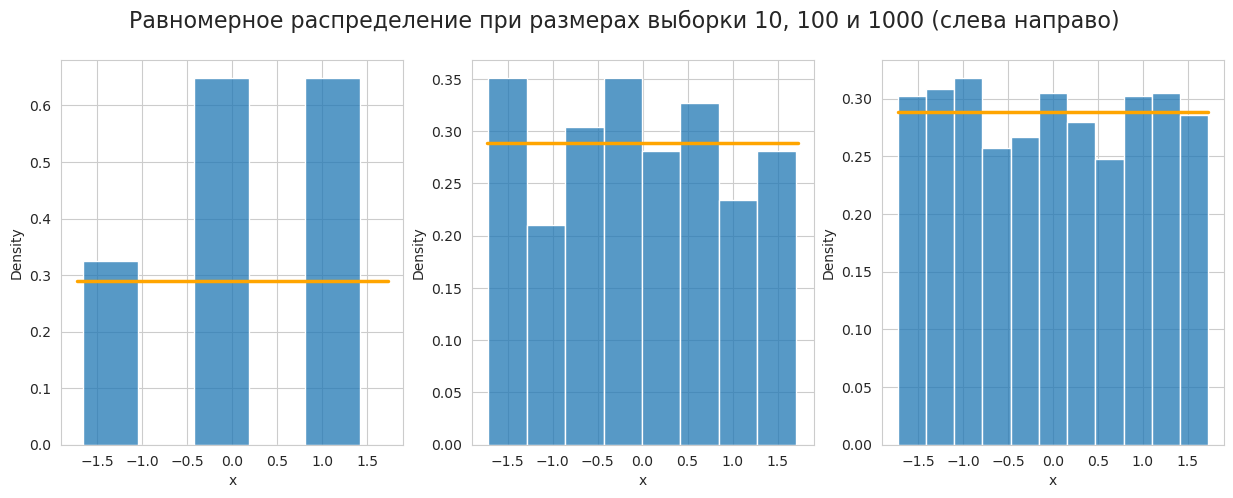

In [171]:
# loc = a
# loc + scale = b
# loc = a = -sqrt(3)
# scale = 2sqrt(3)

show_different_n(dists[4][1],dists[4][0],loc=-sqrt(3), scale=2*sqrt(3))

# Лабораторная 2

In [3]:
def get_five_values(n,dist,**param):
    
    random_data = dist.rvs(size = n,**param)
    
    selective_mean = np.mean(random_data)
    
    median = np.median(random_data)
    
    half_sum_extrim = (np.max(random_data) + np.min(random_data))
    
    Q1 = np.percentile(random_data, 25)
    Q3 = np.percentile(random_data, 75)
    z_Q = (Q1 + Q3) / 2
    
    z_tr = trim_mean(random_data, proportiontocut=0.1)
    
    return pd.Series((selective_mean, median, half_sum_extrim, z_Q, z_tr))

In [4]:
indexes = [ 'Выборочное среднее',
            'Медиана',
            'Полусумма экстремальных элементов',
            'Полусумма квартилей',
            'Усечённое среднее']


def show_esstimates(dist,real_values,**params):

    all_results = np.zeros((1000,5,3))

    for g in range(1000):
        temp_results = pd.DataFrame({
            "Название значения": indexes
        })

        for i in range(3):
#             all_results[g, : , i] = get_five_values(10 * 10**i, norm, loc=0, scale=1)
            all_results[g, : , i] = get_five_values(10 * 10**i, dist, **params)
            
    mean_values = np.mean(all_results, axis=0)

    var_values = np.std(all_results,axis=0)

    mean_values = np.round(mean_values,1)
    var_values = np.round(var_values,1)

    combined_df = pd.DataFrame(index= indexes,
                               columns=[f'n = {10 * 10**i}' for i in range(3)] + ['Теоретическое значение'])

    for i in range(5):
        for j in range(3):
            combined_df.iloc[i, j] = f"{mean_values[i, j]:.1f} ± {var_values[i, j]:.1f}"


    combined_df.iloc[:,3] = real_values

    return combined_df
    

In [5]:
#функция расчёта полуссумы квартилей
def get_ZQ(dist,**parms):
    Q1_theor = dist.ppf(0.25,**parms)
    Q3_theor = dist.ppf(0.75,**parms)
    return (Q1_theor + Q3_theor) / 2
    

In [27]:
#результаты для нормального распределения

real_values = (0,0,0, get_ZQ(norm,loc=0, scale=1),0)

show_esstimates(norm, real_values,loc=0, scale=1 )

,n = 10,n = 100,n = 1000,Теоретическое значение
Выборочное среднее,-0.0 ± 0.3,-0.0 ± 0.1,0.0 ± 0.0,0
Медиана,-0.0 ± 0.4,0.0 ± 0.1,-0.0 ± 0.0,0
Полусумма экстремальных элементов,-0.0 ± 0.8,-0.0 ± 0.6,-0.0 ± 0.5,0
Полусумма квартилей,-0.0 ± 0.3,0.0 ± 0.1,0.0 ± 0.0,0.0
Усечённое среднее,-0.0 ± 0.3,0.0 ± 0.1,0.0 ± 0.0,0


In [29]:
#результаты для распределения Коши

real_values = ('Не существует',0,'Не существует', get_ZQ(cauchy,loc=0, scale=1),0)

show_esstimates(cauchy, real_values,loc=0, scale=1 )

,n = 10,n = 100,n = 1000,Теоретическое значение
Выборочное среднее,-0.0 ± 15.4,6.6 ± 225.8,37.2 ± 1157.0,Не существует
Медиана,-0.0 ± 0.6,0.0 ± 0.2,0.0 ± 0.0,0
Полусумма экстремальных элементов,0.1 ± 151.9,664.7 ± 22580.4,37210.2 ± 1156975.9,Не существует
Полусумма квартилей,-0.0 ± 1.0,0.0 ± 0.2,0.0 ± 0.1,0.0
Усечённое среднее,-0.1 ± 1.2,0.0 ± 0.2,0.0 ± 0.1,0


In [30]:
#результаты для Лапласа

real_values = (0,0,0, get_ZQ(laplace,loc=0, scale=1/sqrt(2)),0)

show_esstimates(laplace, real_values,loc=0, scale=1 )

,n = 10,n = 100,n = 1000,Теоретическое значение
Выборочное среднее,0.0 ± 0.5,0.0 ± 0.1,0.0 ± 0.0,0
Медиана,-0.0 ± 0.4,0.0 ± 0.1,0.0 ± 0.0,0
Полусумма экстремальных элементов,0.0 ± 1.8,-0.0 ± 1.8,-0.0 ± 1.8,0
Полусумма квартилей,-0.0 ± 0.4,0.0 ± 0.1,0.0 ± 0.0,0.0
Усечённое среднее,-0.0 ± 0.4,0.0 ± 0.1,0.0 ± 0.0,0


In [26]:
#результаты для Пуассона

real_values = (5,5,'∞', get_ZQ(poisson,mu = 5),5)

show_esstimates(poisson, real_values,mu = 5)

,n = 10,n = 100,n = 1000,Теоретическое значение
Выборочное среднее,5.0 ± 0.7,5.0 ± 0.2,5.0 ± 0.1,5
Медиана,4.8 ± 0.8,4.9 ± 0.3,5.0 ± 0.0,5
Полусумма экстремальных элементов,10.5 ± 1.9,11.9 ± 1.4,13.6 ± 1.1,∞
Полусумма квартилей,4.9 ± 0.8,4.9 ± 0.4,4.7 ± 0.3,4.5
Усечённое среднее,4.9 ± 0.7,4.9 ± 0.2,4.9 ± 0.1,5


In [9]:
#результаты для равномерного распределения

real_values = (0,0,0, get_ZQ(uniform,loc=-sqrt(3), scale=2*sqrt(3)),0)

show_esstimates(uniform, real_values,loc=-sqrt(3), scale=2*sqrt(3))

,n = 10,n = 100,n = 1000,Теоретическое значение
Выборочное среднее,0.0 ± 0.3,0.0 ± 0.1,-0.0 ± 0.0,0
Медиана,0.0 ± 0.5,0.0 ± 0.2,0.0 ± 0.1,0
Полусумма экстремальных элементов,-0.0 ± 0.4,0.0 ± 0.0,-0.0 ± 0.0,0
Полусумма квартилей,0.0 ± 0.4,0.0 ± 0.1,-0.0 ± 0.0,0.0
Усечённое среднее,0.0 ± 0.4,0.0 ± 0.1,-0.0 ± 0.0,0
